# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

## <center>Практическая часть<a class="anchor" id="practice"></a><center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

__Задача:__ предсказание баллов ЕГЭ ученика

In [3]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [5]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [6]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

-4.163336342344337e-17 0.9999999999999999


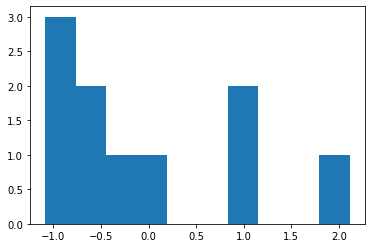

In [7]:
ind = 2
print(np.mean(X_st[:, ind]), np.std(X_st[:, ind]))
plt.hist(X_st[:, ind])
plt.show()

In [8]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [9]:
np.sign(0)

0

In [14]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
   
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred) 

        dQ = 2/n * X.T @ (y_pred - y)     #градиент функции ошибдки
        dReg = reg * np.sign(W)           # градиент регулизации

        W -= eta * (dQ + dReg)

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')

    print(f'Final MSE: {calc_mse(y, np.dot(X,W))}')
    return W




In [15]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-2, reg=1e-2)

Iter: 0, weights: [ 2.72907492  2.47469911 -1.12564684 -1.81869237], error 3200.074651964557
Iter: 500, weights: [56.49279431  6.05850987  1.07462096  5.33522388], error 25.27835293379112
Iter: 1000, weights: [56.49499991  6.19530977  0.16380905  6.1364186 ], error 24.952999159308185
Iter: 1500, weights: [56.495       6.25138973 -0.13926058  6.39688308], error 24.91288004009806
Iter: 2000, weights: [56.495       6.27115149 -0.24000579  6.4810918 ], error 24.90698888388891
Iter: 2500, weights: [56.495       6.27863001 -0.27638296  6.51117123], error 24.905750628076767
Iter: 3000, weights: [56.495       6.28134054 -0.2894825   6.52198626], error 24.905419391536427
Iter: 3500, weights: [56.495       6.28231713 -0.29419786  6.52587843], error 24.905315005334955
Iter: 4000, weights: [56.495       6.28266869 -0.29589514  6.52727936], error 24.90527935550475
Iter: 4500, weights: [56.495       6.28279524 -0.29650605  6.52778361], error 24.90526677282866
Final MSE: 24.905262276085132


array([56.495     ,  6.28284073, -0.2967257 ,  6.5279649 ])

*Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [16]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [17]:
def min_max_scala(X):
    return(X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))


In [18]:
X_norm = X.copy().astype('float64')
X_norm = min_max_scala(X_norm[:, 1:])
X_norm.min(axis=0), X_norm.max(axis=0)

(array([0., 0., 0.]), array([1., 1., 1.]))

In [19]:
X_norm.mean(axis=0), X_norm.std(axis=0)

(array([0.3       , 0.33870968, 0.35      ]),
 array([0.28284271, 0.31283671, 0.39051248]))

In [20]:
X_norm_st = standard_scale(X_norm)
X_norm_st.min(axis=0), X_norm_st.max(axis=0)

(array([-1.06066017, -1.08270439, -0.89625816]),
 array([2.47487373, 2.11385144, 1.66447944]))

In [21]:
X_norm_st.mean(axis=0), X_norm_st.std(axis=0)

(array([-1.49880108e-16, -6.86950496e-17,  8.32667268e-17]),
 array([1., 1., 1.]))